Name : Shubham Shaha

PRN : 240340128031

### Q1. Download the file research-papers.csv from the link below:

https://mitu.co.in/dataset

This file contains the collection research papers received in different categories.

Perform the following operations on it:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1. Read the file

In [ ]:
df = pd.read_csv("research-papers.csv")
df

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
...,...,...,...,...,...,...,...,...,...,...
53469,53469,math/0603084v1,Advances on nonparametric regression for funct...,We consider the problem of predicting a real r...,Frédéric Ferraty,http://arxiv.org/pdf/math/0603084v1,2006-03-03T13:25:42Z,2006-03-03T13:25:42Z,math.ST,"['math.ST', 'stat.TH']"
53470,53470,math/0603123v1,Ranking and empirical minimization of U-statis...,"The problem of ranking/ordering instances, ins...",Stéphan Clémençon,http://arxiv.org/pdf/math/0603123v1,2006-03-05T17:10:54Z,2006-03-05T17:10:54Z,math.ST,"['math.ST', 'stat.TH', '68Q32, 60G99, 62G99, 6..."
53471,53471,math/0603130v1,Nonparametric methods for inference in the pre...,"We suggest two nonparametric approaches, based...",Peter Hall,http://arxiv.org/pdf/math/0603130v1,2006-03-06T07:31:27Z,2006-03-06T07:31:27Z,math.ST,"['math.ST', 'stat.TH', '62G08 (Primary) 62G20 ..."
53472,53472,math/0603132v1,Functional linear regression analysis for long...,We propose nonparametric methods for functiona...,Fang Yao,http://arxiv.org/pdf/math/0603132v1,2006-03-06T08:09:42Z,2006-03-06T08:09:42Z,math.ST,"['math.ST', 'stat.TH', '62M20 (Primary) 60G15,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53474 entries, 0 to 53473
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        53474 non-null  int64 
 1   id                53474 non-null  object
 2   Title             53474 non-null  object
 3   Summary           53474 non-null  object
 4   Author            53474 non-null  object
 5   Link              53474 non-null  object
 6   Publish Date      53474 non-null  object
 7   Update Date       53474 non-null  object
 8   Primary Category  53474 non-null  object
 9   Category          53474 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.1+ MB


2. Seperate input (summary) and output data (primary category)

In [ ]:
df = df[~df['Primary Category'].isna()]
df.shape

(53474, 10)

In [ ]:
df['cat'] = [i.split(".")[0] for i in df['Primary Category'].to_numpy().flatten()]
df['cat'] = [i.split("-")[0] for i in df['cat'].to_numpy().flatten()]
df

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category,cat
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI'],cs
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI'],cs
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI'],cs
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI'],cs
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI'],cs
...,...,...,...,...,...,...,...,...,...,...,...
53469,53469,math/0603084v1,Advances on nonparametric regression for funct...,We consider the problem of predicting a real r...,Frédéric Ferraty,http://arxiv.org/pdf/math/0603084v1,2006-03-03T13:25:42Z,2006-03-03T13:25:42Z,math.ST,"['math.ST', 'stat.TH']",math
53470,53470,math/0603123v1,Ranking and empirical minimization of U-statis...,"The problem of ranking/ordering instances, ins...",Stéphan Clémençon,http://arxiv.org/pdf/math/0603123v1,2006-03-05T17:10:54Z,2006-03-05T17:10:54Z,math.ST,"['math.ST', 'stat.TH', '68Q32, 60G99, 62G99, 6...",math
53471,53471,math/0603130v1,Nonparametric methods for inference in the pre...,"We suggest two nonparametric approaches, based...",Peter Hall,http://arxiv.org/pdf/math/0603130v1,2006-03-06T07:31:27Z,2006-03-06T07:31:27Z,math.ST,"['math.ST', 'stat.TH', '62G08 (Primary) 62G20 ...",math
53472,53472,math/0603132v1,Functional linear regression analysis for long...,We propose nonparametric methods for functiona...,Fang Yao,http://arxiv.org/pdf/math/0603132v1,2006-03-06T08:09:42Z,2006-03-06T08:09:42Z,math.ST,"['math.ST', 'stat.TH', '62M20 (Primary) 60G15,...",math


In [ ]:
df_category = pd.DataFrame(df['cat'].value_counts()).reset_index()
caregories = df_category[df_category['count'] > 1]['cat']
df = df[df['cat'].isin(caregories)]
df.shape

(53474, 11)

In [ ]:
X = df['Summary']
y = df['cat']
X

0        Because of their occasional need to return to ...
1        Market price systems constitute a well-underst...
2        We describe an extensive study of search in GS...
3        As real logic programmers normally use cut (!)...
4        To support the goal of allowing users to recor...
                               ...                        
53469    We consider the problem of predicting a real r...
53470    The problem of ranking/ordering instances, ins...
53471    We suggest two nonparametric approaches, based...
53472    We propose nonparametric methods for functiona...
53473    Estimation of a quadratic functional over para...
Name: Summary, Length: 53474, dtype: object

In [ ]:
len(y.value_counts())

15

3. Explore the output data

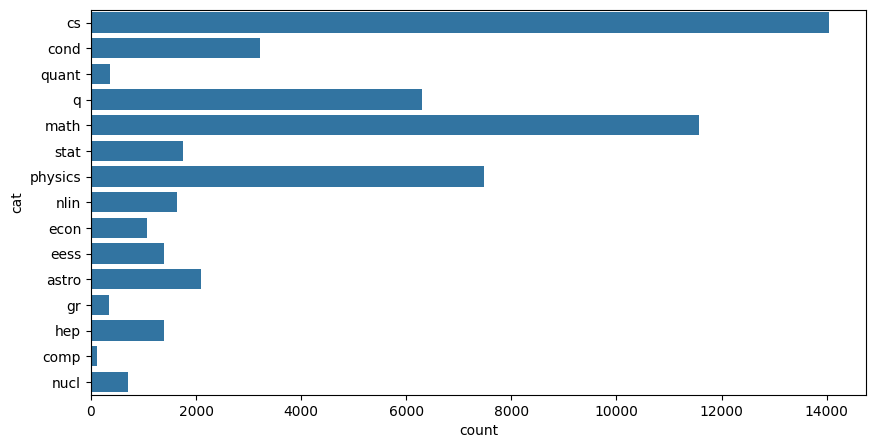

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y = y);

4. Prepare and vectorize the data

In [ ]:
## Cleaning and stemming
def clean_text(sent):
    tokens1 = word_tokenize(sent) ## tokenize
    tokens2 = [token for token in tokens1 if token.isalnum()] ## remove punctuations
    swords = stopwords.words('english')
    tokens3 = [token for token in tokens2 if token.lower() not in swords] ## Remove stopwords
    ps = PorterStemmer()
    tokens4 = [ps.stem(token) for token in tokens3] ## stemming
    return tokens4

## TFIDF vectorization
tfidf = TfidfVectorizer(analyzer = clean_text)
x_new = tfidf.fit_transform(X)
x_new

<53474x56587 sparse matrix of type '<class 'numpy.float64'>'
	with 2675791 stored elements in Compressed Sparse Row format>

5. Cross validate the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state = 0, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40105, 56587), (13369, 56587), (40105,), (13369,))

6. Build the KNN model for classification with neighbors = 15

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

7. Evaluate the performance of algorithm

0.7253347295983245
              precision    recall  f1-score   support

       astro       0.88      0.79      0.83       525
        comp       0.55      0.39      0.46        28
        cond       0.72      0.71      0.71       804
          cs       0.69      0.85      0.76      3511
        econ       0.62      0.24      0.34       268
        eess       0.66      0.22      0.33       349
          gr       0.71      0.43      0.53        87
         hep       0.74      0.67      0.70       350
        math       0.74      0.88      0.80      2893
        nlin       0.66      0.41      0.50       407
        nucl       0.80      0.56      0.66       175
     physics       0.70      0.58      0.63      1871
           q       0.80      0.78      0.79      1574
       quant       0.72      0.37      0.49        89
        stat       0.67      0.34      0.45       438

    accuracy                           0.73     13369
   macro avg       0.71      0.55      0.60     13369
weighte

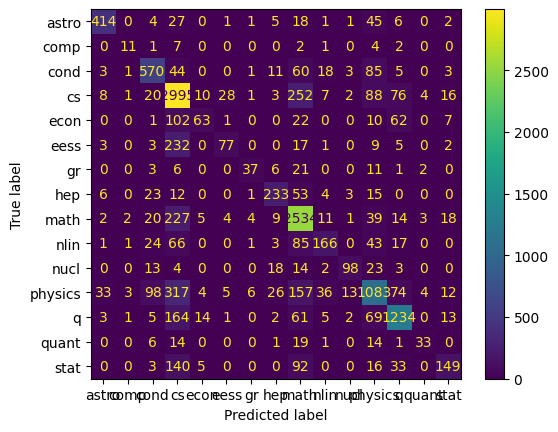

In [ ]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Q2. Download the file sarcasm-clusters.txt from the link below:

https://mitu.co.in/dataset

This file contains the collection unlabeled tweets where few are sarcastic and few
are not.

Perform the following operations on it:

1. Read the file

In [2]:
data = []
with open("sarcasm-clusters.txt") as f:
    data = f.readlines()

data = [x.strip() for x in data]
df = pd.DataFrame({'sarcasm':data})
df.head()

,sarcasm
0,It feels like just a few days ago it was the l...
1,"I love my mom . No matter what we go through ,..."
2,Bump that music ... #imtryingtosleep
3,Mexican and black jokes are pretty much the sa...
4,How to find work you love :


2. Clean, Prepare and vectorize the data

In [3]:
# define lemmatizer function
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
swords = stopwords.words('english')

def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    return wnl.lemmatize(word, pos = pos)

def clean_text2(text):
    tokens1 = word_tokenize(text)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

tfv = TfidfVectorizer()
tfv = TfidfVectorizer(analyzer=clean_text2)
x_new = tfv.fit_transform(df['sarcasm'])
x_new

<51189x42845 sparse matrix of type '<class 'numpy.float64'>'
	with 421419 stored elements in Compressed Sparse Row format>

3. Build the K-means clustering algorithm with 2 clusters

In [4]:
km = KMeans(random_state=0,n_clusters=2)
km.fit_predict(x_new)
print(km.labels_)
print(km.inertia_)

df['labels'] = km.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 0 0 0]
50673.204210846234


,sarcasm,labels
0,It feels like just a few days ago it was the l...,0
1,"I love my mom . No matter what we go through ,...",1
2,Bump that music ... #imtryingtosleep,0
3,Mexican and black jokes are pretty much the sa...,0
4,How to find work you love :,1


4. Show the tweets with 0 and 1 labels respectively.

In [5]:
## Tweets with labes=1
df[df['labels']==1].head()

,sarcasm,labels
1,"I love my mom . No matter what we go through ,...",1
4,How to find work you love :,1
10,@pitchfork @EODMofficial WE LOVE YOU ! STAY SA...,1
15,I love it when the bus smells like cat piss an...,1
27,Love means never being able to like another gi...,1


In [6]:
## Tweets with labes=1
df[df['labels']==0].head()

,sarcasm,labels
0,It feels like just a few days ago it was the l...,0
2,Bump that music ... #imtryingtosleep,0
3,Mexican and black jokes are pretty much the sa...,0
5,"""@WolfpackAlan : You know what I like to do ? ...",0
6,You seem like a basketball player ! — I am Tha...,0


5. Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

In [7]:
from nltk import FreqDist
new0 = " ".join(df[df['labels']==0].iloc[:,0])
clean0 = [x.lower() for x in word_tokenize(new0) if x.lower() not in swords and x.isalpha()]
freq0= FreqDist(clean0)
print("Top 10 non sarcastic tweet's words")
freq0.most_common(10)

Top 10 non sarcastic tweet's words


[('like', 3764),
 ('get', 2481),
 ('day', 2344),
 ('people', 2185),
 ('good', 2063),
 ('great', 2062),
 ('one', 1849),
 ('rt', 1787),
 ('time', 1686),
 ('really', 1667)]

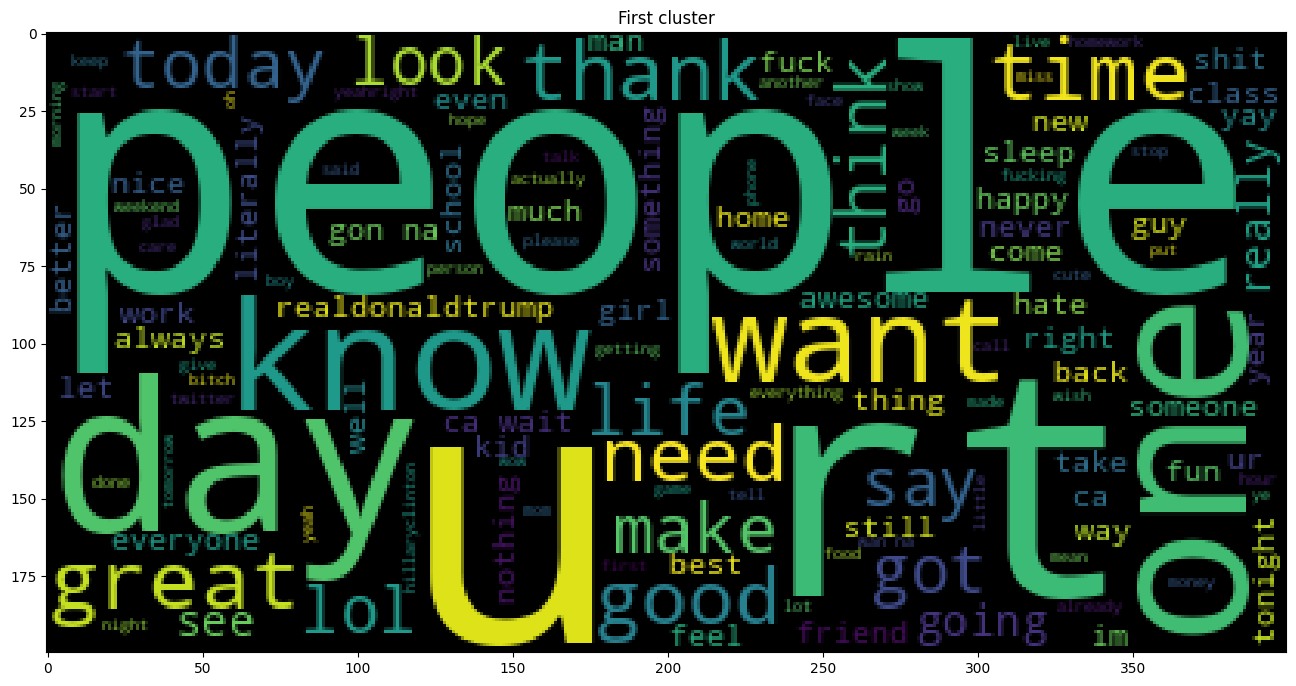

In [8]:
wc0 = WordCloud().generate(" ".join(clean0))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc0)

In [9]:
new1 = " ".join(df[df['labels']==1].iloc[:,0])
clean1 = [x.lower() for x in word_tokenize(new1) if x.lower() not in swords and x.isalpha()]
freq1= FreqDist(clean1)
print("Top 10 sarcastic tweet's words")
freq1.most_common(10)

Top 10 sarcastic tweet's words


[('love', 5610),
 ('much', 478),
 ('like', 394),
 ('u', 385),
 ('day', 359),
 ('people', 288),
 ('happy', 258),
 ('get', 228),
 ('one', 214),
 ('know', 205)]

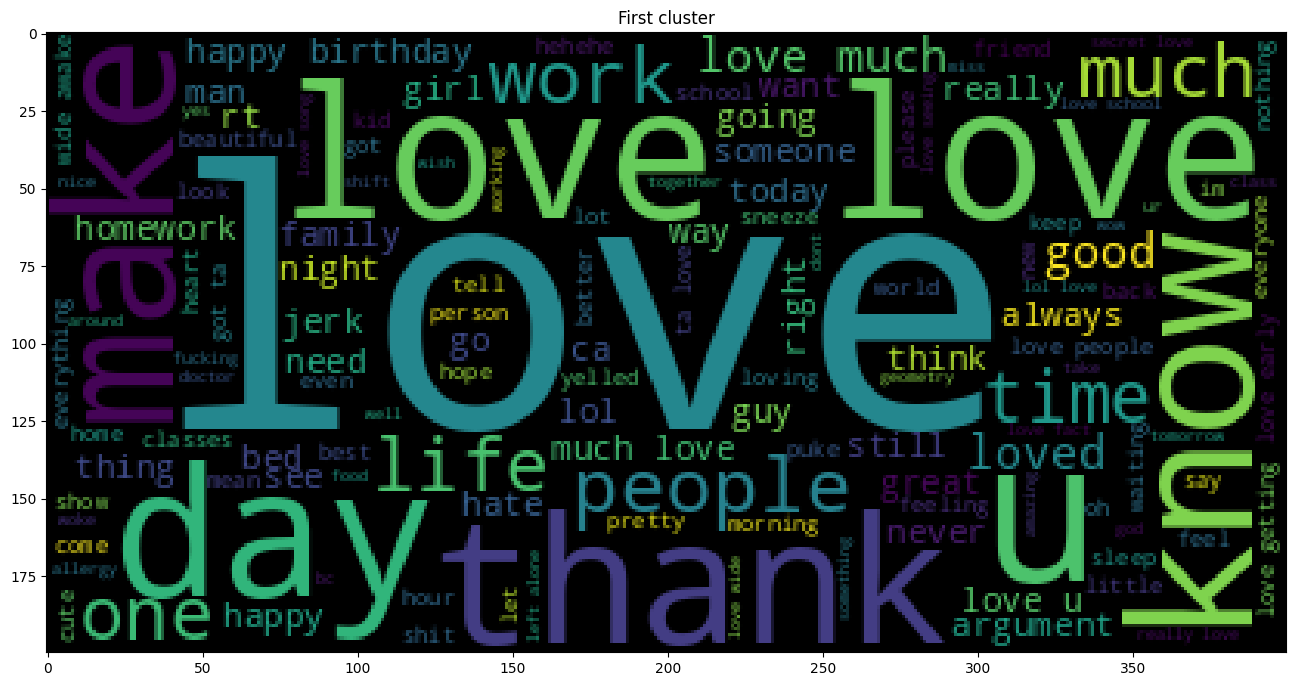

In [10]:
wc1 = WordCloud().generate(" ".join(clean1))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc1)